### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_1 = pd.read_table('Twitter.data',sep=',',header=None)
# As the dataset is large we will run our model on the 10% of the dataset
sample_df = df_1.sample(frac=0.01,random_state=5).reset_index().iloc[:,1:]

In [3]:
X = sample_df.iloc[:,:77]
y = sample_df.iloc[:,77]

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings('ignore')
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=5)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [ ]:
## Bagging (Ridge Regression with no hyper-parameter tuning)

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
bagging_ridge = BaggingRegressor(Ridge(), bootstrap = True,random_state=5)
score = cross_val_score(bagging_ridge, X_train, y_train, cv = 5)
predictions = cross_val_predict(bagging_ridge, X_test, y_test, cv=  5)
accuracy = metrics.r2_score(y_test, predictions) 
# print("Cross validation scores for Ridge with Bagging: {}".format(scores)) 
# print("Average Cross validation scores for Ridge Regression with Bagging: {}".format(scores.mean()))
# print("Cross-Predicted Accuracy for Linear Ridge with Bagging:", str(accuracy)) 
bagging_ridge_report= [['Bagging - Ridge','',score.mean(),accuracy]]
title = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(bagging_ridge_report,columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,Bagging - Ridge,,0.950044,0.954855


In [ ]:
## Ridge Regression with no hyper-parameter tuning

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
bagging_ridge = BaggingRegressor(LinearRegression(), bootstrap = True,random_state=5)
score = cross_val_score(bagging_ridge, X_train, y_train, cv = 5)
predictions = cross_val_predict(bagging_ridge, X_test, y_test, cv = 5)
accuracy = metrics.r2_score(y_test, predictions) 
bagging_ridge_report= [['Bagging - Linear Regression','',score.mean(),accuracy]]
title = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(bagging_ridge_report,columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,Bagging - Linear Regression,,0.947857,0.926129


In [ ]:
## AdaBoosting Regressor (Decision Tree Regressor)

In [8]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_tree_backing = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3)
ada_boost = AdaBoostRegressor(ada_tree_backing, learning_rate=0.1, loss='square', n_estimators=1000)
ada_boost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='random'),
         learning_rate=0.1, loss='square', n_estimators=1000,
         random_state=None)

In [9]:
ada_train_score = ada_boost.score(X_train,y_train)
ada_test_score = ada_boost.score(X_test,y_test)

In [10]:
ada_report= [['ADA Boostinf - Decision Tree Regressor',ada_boost.estimators_,ada_train_score,ada_test_score]]
title = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(ada_report,columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,ADA Boostinf - Decision Tree Regressor,"[DecisionTreeRegressor(criterion='mse', max_de...",0.56932,0.578139


In [11]:
ada_report= [['ADA Boostinf - Decision Tree Regressor',ada_boost.estimators_,ada_train_score,ada_test_score]]
title = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(ada_report,columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,ADA Boostinf - Decision Tree Regressor,"[DecisionTreeRegressor(criterion='mse', max_de...",0.56932,0.578139


In [12]:
## AdaBoosting Regressor (Random Forest Regressor)

In [14]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
rand_rgr = RandomForestRegressor(max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2)
rfr_ada_boost = AdaBoostRegressor(rand_rgr, learning_rate=0.1, loss='square', n_estimators=1000)
rfr_ada_boost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
         learning_rate=0.1, loss='square', n_estimators=1000,
         random_state=None)

In [ ]:
rfr_ada_train_score = rfr_ada_boost.score(X_train,y_train)
rfr_ada_train_score = rfr_ada_boost.score(X_test,y_test)

In [ ]:
rfr_ada_report= [['ADA Boosting - Random Forest Regressor',rfr_ada_boost.estimators_,rfr_ada_train_score,rfr_ada_train_score]]
title = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(rfr_ada_report,columns=title)

In [ ]:
## Gradient Boosting Regressor

In [12]:
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gb_param_grid = {'n_estimators':range(2,10),'max_depth': range(2,5),'learning_rate':[0.1,1.0,10],'random_state' : [1]}
gb_grid_search = GridSearchCV(GradientBoostingRegressor(),gb_param_grid,cv=5,return_train_score=True)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(2, 10), 'max_depth': range(2, 5), 'learning_rate': [0.1, 1.0, 10], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
gb_train_score = gb_grid_search.score(X_train,y_train)
gb_test_score = gb_grid_search.score(X_test,y_test)

In [14]:
gb_report= [['Gradient Boosting Regressor',gb_grid_search.best_params_,gb_train_score,gb_test_score]]
title = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(gb_report,columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,Gradient Boosting Regressor,"{'learning_rate': 1.0, 'max_depth': 4, 'n_esti...",0.978769,0.878573


In [ ]:
## Applying PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95,whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

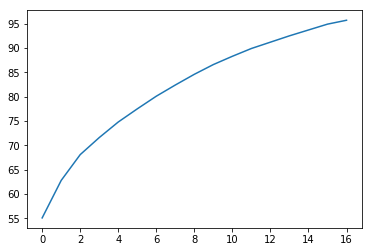

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
var=np.cumsum(np.round(pca.explained_variance_ratio_*100, decimals=1))
plt.plot(var)

In [17]:
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
print('Train Shape after PCA Reduction',pca_X_train.shape[1])
print('Test Shape after PCA Reduction',pca_X_test.shape[1])

Train Shape after PCA Reduction 17
Test Shape after PCA Reduction 17


In [ ]:
## KNeighborsRegressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn_param_grid = {'n_neighbors':range(2,10)}
knn_grid_search = GridSearchCV(KNeighborsRegressor(),knn_param_grid,cv=5,return_train_score=True)
knn_grid_search.fit(pca_X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [20]:
knn_train_score = knn_grid_search.score(pca_X_train,y_train)
knn_test_score = knn_grid_search.score(pca_X_test,y_test)knn_train_score = knn_grid_search.score(pca_X_train,y_train)
knn_test_score = knn_grid_search.score(pca_X_test,y_test)

SyntaxError: invalid syntax (<ipython-input-20-c259921938b2>, line 2)

In [21]:
knn_report= [['KNeighborsRegressor',knn_grid_search.best_params_,knn_train_score,knn_test_score]]
title = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(knn_report,columns=title)

NameError: name 'knn_train_score' is not defined

In [ ]:
## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lr_param_grid={'n_jobs':[-1]}
lr_grid_search = GridSearchCV(LinearRegression(),param_grid=lr_param_grid,cv=5,return_train_score=True)
lr_grid_search.fit(pca_X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
lr_train_score = round(lr_grid_search.score(pca_X_train, y_train),5)
lr_test_score = round(lr_grid_search.score(pca_X_test, y_test),5)

In [24]:
lr_report = [['LinearRegression','',lr_train_score,lr_test_score]]
pd.DataFrame(lr_report,columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,LinearRegression,,0.93342,0.94901


In [ ]:
## SGDRegressor

In [25]:
from sklearn.linear_model import SGDRegressor
param_grid={'max_iter':[10,100,1000,10000],'learning_rate':['optimal'],'penalty':['l1','l2']}
grid_search = GridSearchCV(SGDRegressor(),param_grid,cv=5,return_train_score=True)
grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [10, 100, 1000, 10000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
sg_train_score = grid_search.score(pca_X_train,y_train)
sg_test_score = grid_search.score(pca_X_test,y_test)
param = grid_search.best_params_

In [27]:
sg_report = [['SGDRegressor',param,sg_train_score,sg_test_score]]
pd.DataFrame(sg_report, columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,SGDRegressor,"{'learning_rate': 'optimal', 'max_iter': 10000...",0.933355,0.948963


In [ ]:
## Ridge

In [28]:
from sklearn.linear_model import Ridge
ridge_train_array = []
ridge_test_array = []

In [29]:
param_grid={'alpha':[0.01,0.1,1,10,100]}
ridge_grid_search = GridSearchCV(Ridge(),param_grid=param_grid,cv=5,return_train_score=True)
ridge_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
ridge_train_score = ridge_grid_search.score(pca_X_train,y_train)
ridge_test_score = ridge_grid_search.score(pca_X_test,y_test)
ridge_param = ridge_grid_search.best_params_

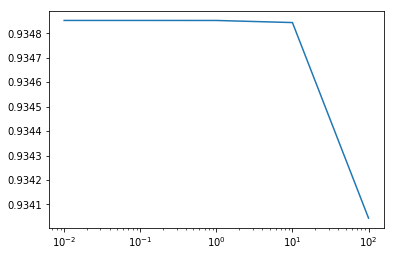

In [31]:
ridge_param_values = [dict['alpha'] for dict in ridge_grid_search.cv_results_['params']]
plt.plot(ridge_param_values,ridge_grid_search.cv_results_['mean_train_score'])
plt.xscale('log')

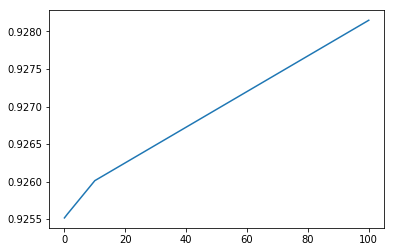

In [32]:
plt.plot(ridge_param_values,ridge_grid_search.cv_results_['mean_test_score'])

In [33]:
ridge_report = [['Ridge',ridge_param,ridge_train_score,ridge_test_score]]
pd.DataFrame(ridge_report,columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,Ridge,{'alpha': 100},0.932952,0.949146


In [ ]:
## Lasso

In [34]:
from sklearn.linear_model import Lasso
param_grid={'alpha':[0.01,0.1,1,10,100]}
lasso_grid_search = GridSearchCV(Lasso(),param_grid=param_grid,cv=5,return_train_score=True)
lasso_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
lasso_train_score = lasso_grid_search.score(pca_X_train,y_train)
lasso_test_score = lasso_grid_search.score(pca_X_test, y_test)
lasso_param = lasso_grid_search.best_params_

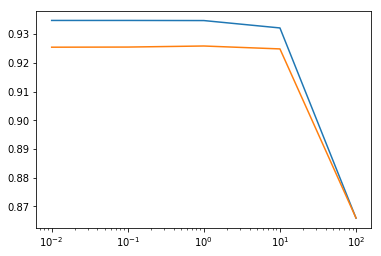

In [36]:
lasso_param_values = [dict['alpha'] for dict in lasso_grid_search.cv_results_['params']]
plt.plot(lasso_param_values,lasso_grid_search.cv_results_['mean_train_score'])
plt.xscale('log')
plt.plot(lasso_param_values,lasso_grid_search.cv_results_['mean_test_score'])

In [37]:
lasso_report = [['Lasso',lasso_param,lasso_train_score,lasso_test_score]]
pd.DataFrame(lasso_report,columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,Lasso,{'alpha': 1},0.933381,0.948865


In [ ]:
## Linear SVR

In [38]:
from sklearn.svm import LinearSVR
param_grid={'C':[0.01,0.1,1,10,100]}
lsvr_grid_search = GridSearchCV(LinearSVR(),param_grid,cv=5,return_train_score=True)
lsvr_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [39]:
lsvr_train_score = lsvr_grid_search.score(pca_X_train,y_train)
lsvr_test_score = lsvr_grid_search.score(pca_X_test,y_test)
lsvr_params = lsvr_grid_search.best_params_

In [40]:
lsvr_report = [['Linear SVR',lsvr_params,lsvr_train_score,lsvr_test_score]]
pd.DataFrame(lsvr_report,columns=title)

,Model,Hyper Parameter,Train Score,Test Score
0,Linear SVR,{'C': 100},0.92253,0.929554


In [ ]:
## RBF SVR

In [ ]:
from sklearn.svm import SVR
param_grid={'C':[0.01,0.1,1,10,100], 'gamma':[0.01,0.1,1,10,100]}
rbfsvr_grid_search = GridSearchCV(SVR(kernel='rbf'),param_grid,cv=5,return_train_score=True)
rbfsvr_grid_search.fit(pca_X_train,y_train)

In [ ]:
rbfsvr_train_score = rbfsvr_grid_search.score(pca_X_train,y_train)
rbfsvr_test_score = rbfsvr_grid_search.score(pca_X_test,y_test)
rbfsvr_params = rbfsvr_grid_search.best_params_

In [ ]:
rbfsvr_report = [['RBF SVR',rbfsvr_params,rbfsvr_train_score,rbfsvr_test_score]]
pd.DataFrame(rbfsvr_report,columns=title)

In [ ]:
## Polynomial SVR

In [41]:
param_grid={'C':[0.01,0.1,1,10,100], 'gamma':[0.01,0.1,1,10,100], 'degree':[2,3]}
polysvr_grid_search = GridSearchCV(SVR(kernel='poly'),param_grid,cv=5,return_train_score=True)
polysvr_grid_search.fit(X_train,y_train)

NameError: name 'SVR' is not defined

In [42]:
polysvr_train_score = polysvr_grid_search.score(X_train,y_train)
polysvr_test_score = polysvr_grid_search.score(X_test,y_test)
polysvr_params = polysvr_grid_search.best_params_

NameError: name 'polysvr_grid_search' is not defined

In [43]:
polysvr_report = [['Poly SVR',polysvr_params,polysvr_train_score,polysvr_test_score]]
pd.DataFrame(polysvr_report,columns=title)

NameError: name 'polysvr_params' is not defined

In [ ]:
## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipe = Pipeline([('poly',PolynomialFeatures()),('lreg',LinearRegression())])
param_grid = {'poly__degree':[2,3]}
poly_grid_search = GridSearchCV(pipe,param_grid=param_grid,cv=5,return_train_score=True)
poly_grid_search.fit(X_train,y_train)

In [ ]:
poly_train_score = poly_grid_search.score(X_train,y_train)
poly_test_score = poly_grid_search.score(X_test,y_test)
poly_param = poly_grid_search.best_params_

In [ ]:
poly_report = [['Polynomial Regression',poly_param,poly_train_score,poly_test_score]]
pd.DataFrame(poly_report,columns=title)

In [ ]:
## Result

In [ ]:
from IPython.display import display, HTML
pd.options.display.float_format = '{:.4f}'.format
# report = pd.DataFrame(knn_report+lr_report+sg_report+ridge_report+lasso_report+poly_report+lsvr_report+polysvr_report,columns=title,index=range(1,9))
report = pd.DataFrame(knn_report+lr_report+poly_report+sg_report+ridge_report+lasso_report+lsvr_report,columns=title,index=range(1,8))

report